In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

2022-12-16 03:36:29.048217: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 03:36:29.854735: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-16 03:36:29.854819: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-16 03:36:29.854829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [2]:
data = pd.read_csv('../00_source_data/synthetic_data_yelp.csv', encoding='latin-1')
data.head()

,label,text
0,1,omgk place smoothi coffe third floor th outsid...
1,1,food averag stuck one back nnmi boyfriend girl...
2,1,first time got half price total bs car wash mi...
3,1,place close hous insult stingi light cant imag...
4,1,everyth els way worth term real authentix shaw...


In [3]:
data['sentiment'] = data['label'].apply(lambda x:'Positive' if x==2 else 'Negative')

In [4]:
sentiment_label = data['sentiment'].factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['Negative', 'Positive'], dtype='object'))

In [5]:
train_x, test_x, train_y, test_y = train_test_split(data['text'], sentiment_label[0], test_size=0.2, random_state=42)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
yelp = train_x.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(yelp)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(yelp)
padded_sequence = pad_sequences(encoded_docs, maxlen=20)

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=20) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            951040    
                                                                 
 spatial_dropout1d (SpatialD  (None, 20, 32)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 967,691
Trainable params: 967,691
Non-trainable params: 0
__________________________________________________

2022-12-16 03:36:32.326336: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-16 03:36:32.326371: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 03:36:32.326391: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-6e26f2): /proc/driver/nvidia/version does not exist
2022-12-16 03:36:32.326634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
history = model.fit(padded_sequence,train_y,
                  validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
200/200 [==============================] - 6s 19ms/step - loss: 0.6030 - accuracy: 0.6594 - val_loss: 0.4611 - val_accuracy: 0.7812
Epoch 2/10
200/200 [==============================] - 3s 17ms/step - loss: 0.3975 - accuracy: 0.8228 - val_loss: 0.4206 - val_accuracy: 0.8006
Epoch 3/10
200/200 [==============================] - 3s 17ms/step - loss: 0.3146 - accuracy: 0.8647 - val_loss: 0.4216 - val_accuracy: 0.8012
Epoch 4/10
200/200 [==============================] - 3s 17ms/step - loss: 0.2629 - accuracy: 0.8881 - val_loss: 0.4461 - val_accuracy: 0.7912
Epoch 5/10
200/200 [==============================] - 3s 17ms/step - loss: 0.2338 - accuracy: 0.9036 - val_loss: 0.5013 - val_accuracy: 0.7975
Epoch 6/10
200/200 [==============================] - 3s 17ms/step - loss: 0.2128 - accuracy: 0.9111 - val_loss: 0.5543 - val_accuracy: 0.7975
Epoch 7/10
200/200 [==============================] - 4s 18ms/step - loss: 0.1974 - accuracy: 0.9189 - val_loss: 0.4910 - val_accuracy: 0.7900

In [9]:
test_pred = tokenizer.texts_to_sequences(test_x.values)
test_pred = pad_sequences(test_pred,maxlen=20)
test_pred = model.predict(test_pred).round()

63/63 [==============================] - 0s 3ms/step


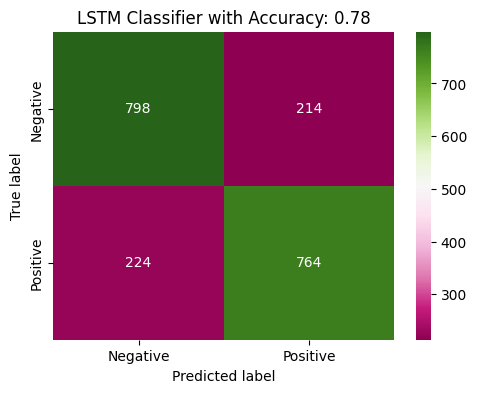

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
# plot confusion matrix
cm = confusion_matrix(test_y, test_pred)
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap="PiYG")
plt.title('LSTM Classifier with Accuracy: {0:.2f}'.format(accuracy_score(test_y, test_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# save plot to file
plt.savefig('../30_results/LSTM_synthetic_data.png')

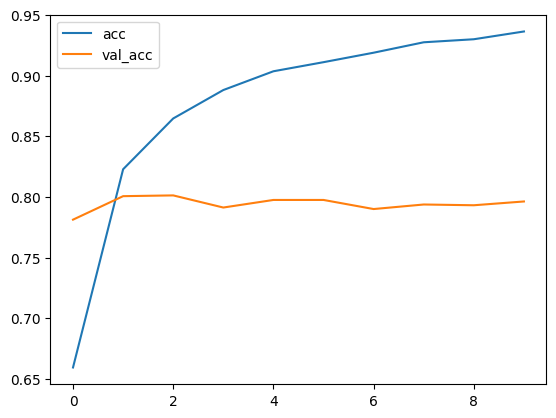

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('../30_results/LSTM_acc_synthetic_data.png')

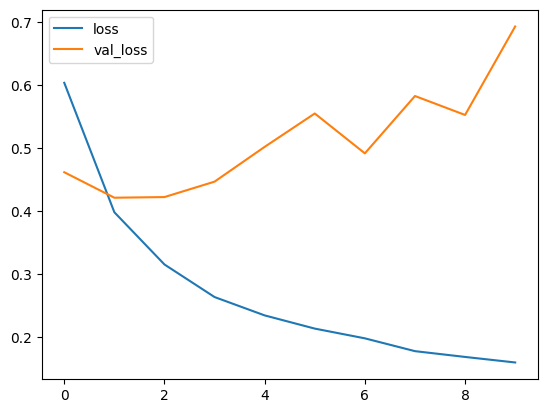

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.savefig('../30_results/LSTM_loss_synthetic_data.png')
plt.show()